In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


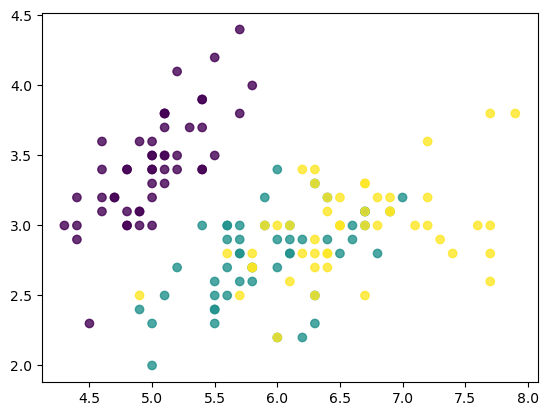

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y , alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

print("Train set : ", X_train.shape)
print("Test set : ", X_test.shape)

Train set :  (120, 4)
Test set :  (30, 4)


Text(0.5, 1.0, 'Test set')

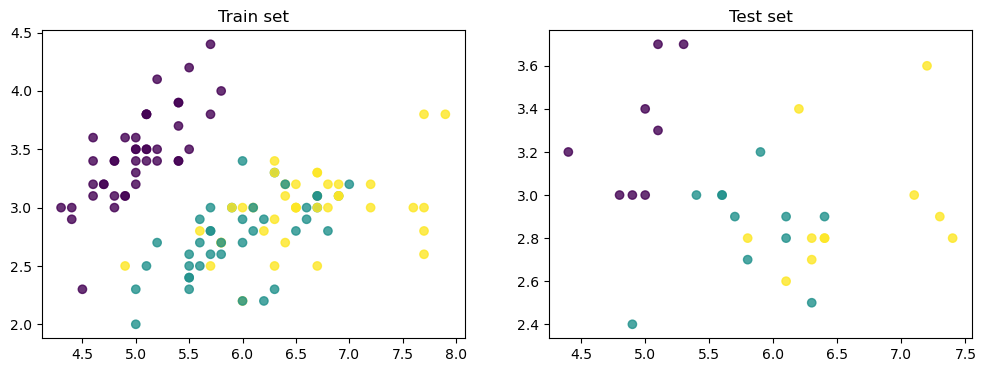

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Train set")
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title("Test set")

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Test score : {model.score(X_test,y_test)}")

Train score : 0.9833333333333333
Test score : 0.9666666666666667


In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring="accuracy").mean()

np.float64(0.9666666666666668)

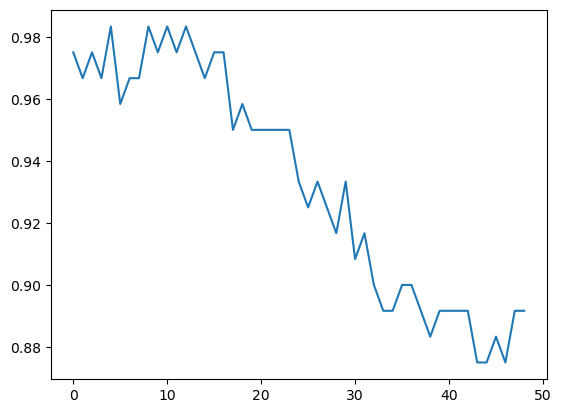

In [10]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

In [11]:
from sklearn.model_selection import validation_curve

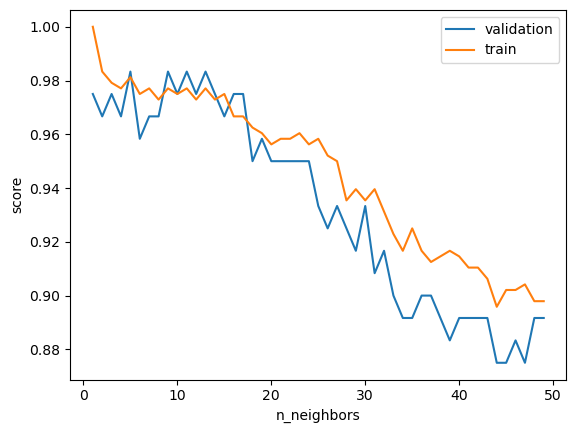

In [19]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = "validation")
plt.plot(k, train_score.mean(axis=1), label = "train")

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    "n_neighbors" : np.arange(1,20),
    "metric" : ["euclidean","manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
grid.best_score_

np.float64(0.9833333333333334)

In [25]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(5)}

In [26]:
model = grid.best_estimator_

In [27]:
model.score(X_test, y_test)

0.9333333333333333

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [30]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


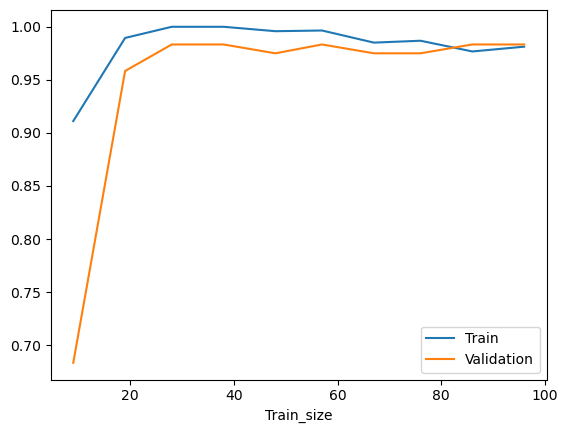

In [32]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1,10))

print(N)
plt.plot(N, train_score.mean(axis=1), label = "Train")
plt.plot(N, val_score.mean(axis=1), label = "Validation")
plt.xlabel("Train_size")
plt.legend()

## 2) Classification survivant du Titanic

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
titanic = df[["survived","pclass","sex","age"]]
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male","female"],[0,1],inplace=True)
titanic.head()

C:\Users\rabah\AppData\Local\Temp\ipykernel_25740\1934347001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0, inplace=True)
C:\Users\rabah\AppData\Local\Temp\ipykernel_25740\1934347001.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["sex"].replace(["male","female"],[0,1],inplace=True)
C:\Users\rabah\AppDat

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [41]:
y = titanic["survived"].values
X = titanic.drop("survived", axis=1)

1


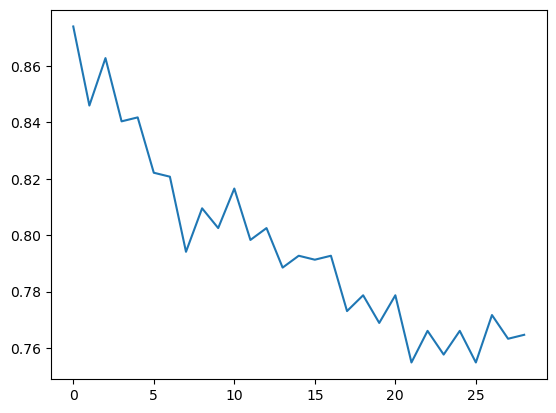

In [42]:
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))

    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)
        
print(best_k)
plt.plot(score)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print(f"score train set : {model.score(X_train, y_train)}")
print(f"score test set : {model.score(X_test, y_test)}")

score train set : 0.8441330998248686
score test set : 0.7342657342657343


In [58]:
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring="accuracy").mean()

np.float64(0.7127841342486653)

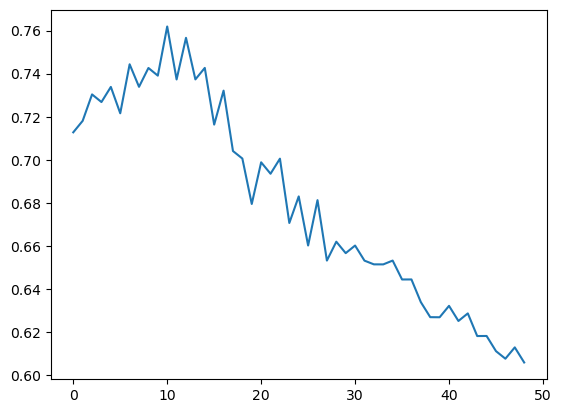

In [59]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

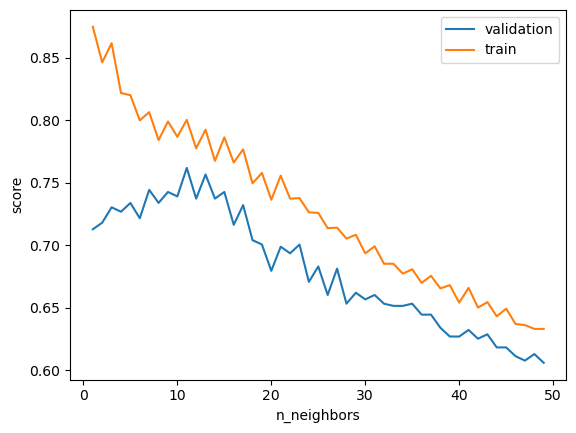

In [60]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = "validation")
plt.plot(k, train_score.mean(axis=1), label = "train")

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend()

In [61]:
param_grid = {
    "n_neighbors" : np.arange(1,20),
    "metric" : ["euclidean","manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [62]:
grid.best_score_

np.float64(0.7810983981693363)

In [63]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(11)}

In [64]:
model = grid.best_estimator_

In [65]:
model.score(X_test, y_test)

0.7202797202797203

In [66]:
confusion_matrix(y_test, model.predict(X_test))

array([[72, 16],
       [24, 31]])

[ 45  91 136 182 228 273 319 364 410 456]


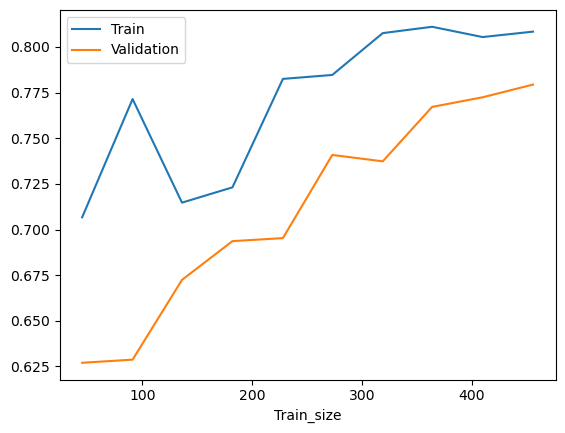

In [67]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1,10))

print(N)
plt.plot(N, train_score.mean(axis=1), label = "Train")
plt.plot(N, val_score.mean(axis=1), label = "Validation")
plt.xlabel("Train_size")
plt.legend()